In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"D:\DS\7. Clustering\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df2 = df.drop(['Unnamed: 0'], axis=1)
df2.head()


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


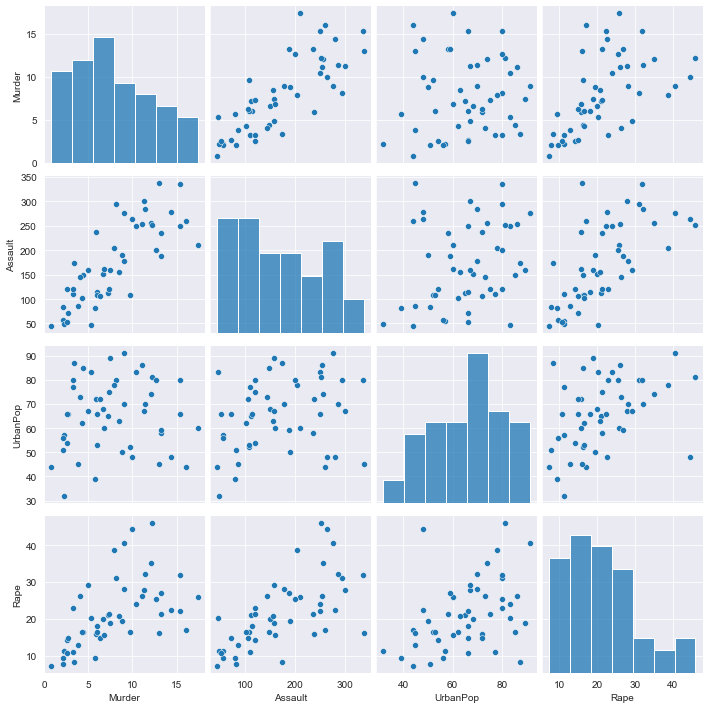

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data=crime2)
plt.show()

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [10]:
df2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
# Normalize heterogenous numerical data 

df2= pd.DataFrame(normalize(df2), columns=df2.columns)
df2.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


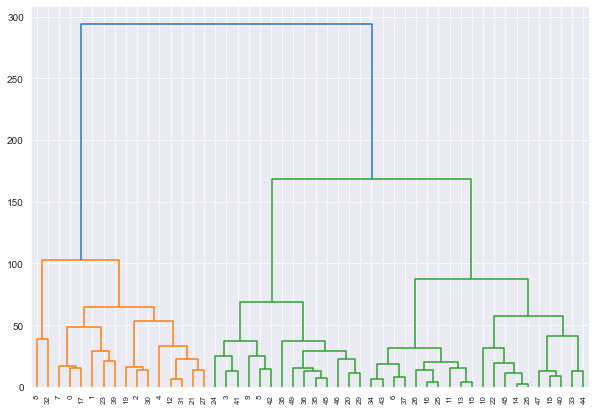

In [12]:
# Creating Dendogram

plt.figure(figsize=(10,7))
dendogram= sch.dendrogram(sch.linkage(crime2, 'complete'))

In [13]:
# create cluster y

hcluster= AgglomerativeClustering(n_clusters=5, linkage= 'ward', affinity= 'euclidean' )
hcluster

AgglomerativeClustering(n_clusters=5)

In [14]:
y = pd.DataFrame(hcluster.fit_predict(df2),columns=['cluster'])
y['cluster'].value_counts()

0    20
3    12
1    12
2     5
4     1
Name: cluster, dtype: int64

In [15]:
df2['cluster']= hcluster.labels_
df2.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.054031,0.966016,0.237411,0.086778,0
1,0.036872,0.969739,0.176987,0.164081,0
2,0.026439,0.959624,0.261122,0.101185,0
3,0.044528,0.961392,0.252998,0.098669,0
4,0.030657,0.940134,0.309972,0.138295,0


In [16]:
df2.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.045019,0.958570,0.252999,0.102582
1,1,0.035272,0.845448,0.515796,0.120321
2,2,0.024747,0.692244,0.707394,0.130090
3,3,0.044328,0.902815,0.403400,0.134434
4,4,0.054546,0.473419,0.854213,0.207893


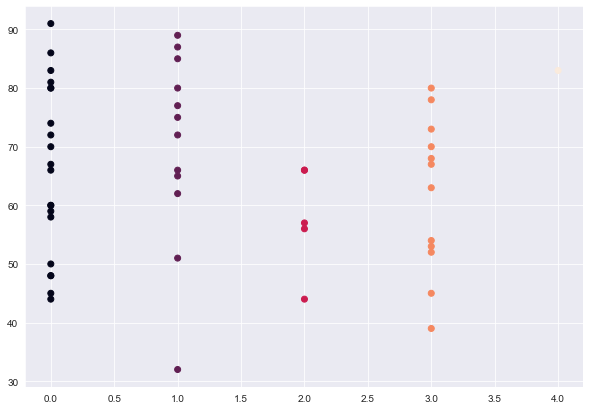

In [17]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(df2['cluster'], crime2['UrbanPop'], c=hcluster.labels_)

# K- means clustering


data is already loaded in crime



In [19]:
df.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df2=crime.drop("Unnamed: 0", axis=1)
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


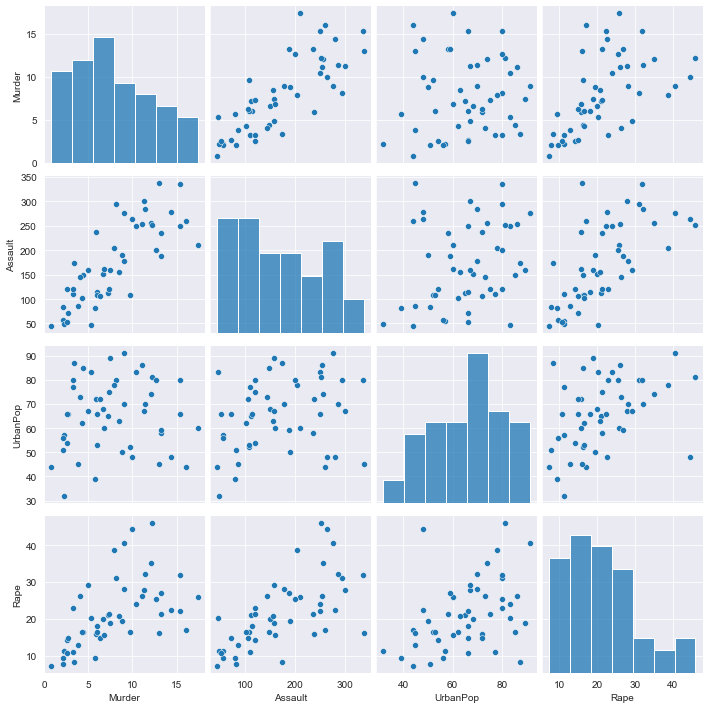

In [21]:
sns.pairplot(df2)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler


In [23]:
# Normalize heterogenous numerical data by using Standard Scaler

sc = StandardScaler()

In [24]:
df2_norm = sc.fit_transform(df2)


In [25]:
# within-cluster sum-of-squares criterion 

vcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=2).fit(df2_norm)
    vcss.append(kmeans.inertia_)

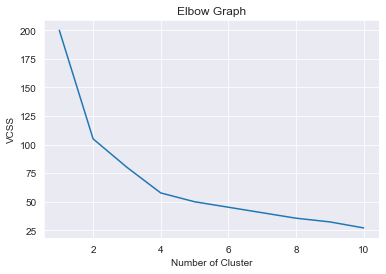

In [26]:
plt.plot(range(1,11), vcss)
plt.title('Elbow Graph')
plt.xlabel('Number of Cluster')
plt.ylabel('VCSS')
plt.show()

# Build cluster using K=4


In [27]:
clusters4=KMeans(4,random_state=30).fit(df2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [28]:
clusters4.labels_


array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [33]:
# Assign clusters to the data set

df4=df2.copy()
df4['clusters4id']=clusters4.labels_
df4.head()

,Murder,Assault,UrbanPop,Rape,clusters4id
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,3
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,3


In [34]:
# Compute the centroids for K=4 clusters with 4 variables

clusters4.cluster_centers_


array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [35]:
df4.groupby('clusters4id').agg(['mean']).reset_index()


,clusters4id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


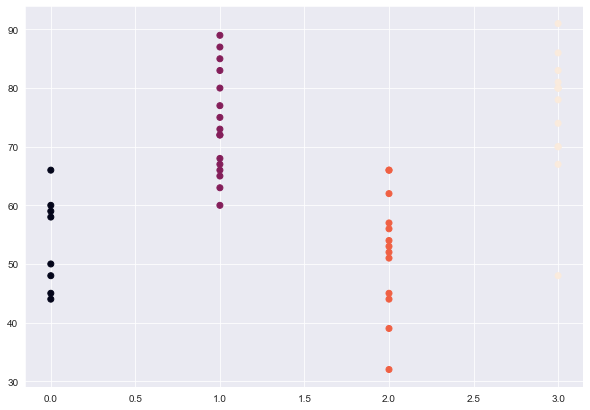

In [36]:
# Plot Cluster

plt.figure(figsize=(10,7))
plt.scatter(crime4['clusters4id'], crime4['UrbanPop'], c=clusters4.labels_)
plt.show()

# Building Cluster using K=5


In [37]:
clusters5 = KMeans(5,random_state=30).fit(df2_norm)
clusters5


KMeans(n_clusters=5, random_state=30)

In [38]:
clusters5.labels_


array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       3, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 0, 0, 0, 0, 4, 1, 3, 1, 2, 4,
       3, 0, 0, 3, 3, 0])

In [39]:
# Assign clusters to the data set

df5=df2.copy()
df5['clusters5id']=clusters5.labels_
df5.head()

,Murder,Assault,UrbanPop,Rape,clusters5id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [40]:
# Compute the centroids for K=5 clusters with 4 variables

clusters5.cluster_centers_

array([[-0.23996529, -0.33082798, -0.0702524 , -0.1343076 ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [41]:
df5.groupby('clusters5id').agg(['mean']).reset_index()


,clusters5id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.753333,143.466667,64.533333,19.986667
1,1,14.671429,251.285714,54.285714,21.685714
2,2,10.966667,264.000000,76.500000,33.608333
3,3,2.680000,70.100000,51.000000,10.910000
4,4,4.500000,126.333333,83.500000,16.266667


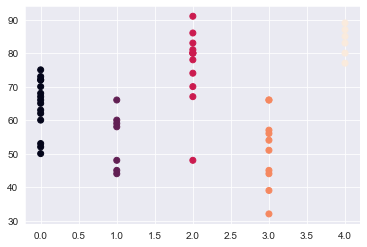

In [42]:
plt.scatter(df5['clusters5id'], df5['UrbanPop'], c=clusters5.labels_)


# DBSCAN

In [43]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [46]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [47]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
df_norm=StandardScaler().fit_transform(df)
df_norm


array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [48]:
# DBSCAN clustering

dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(df_norm)


DBSCAN(eps=1, min_samples=4)

In [49]:
# Adding clusters to dataset

df['clusters']=dbscan.labels_
df

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [50]:
df.groupby("clusters").agg(["mean"]).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


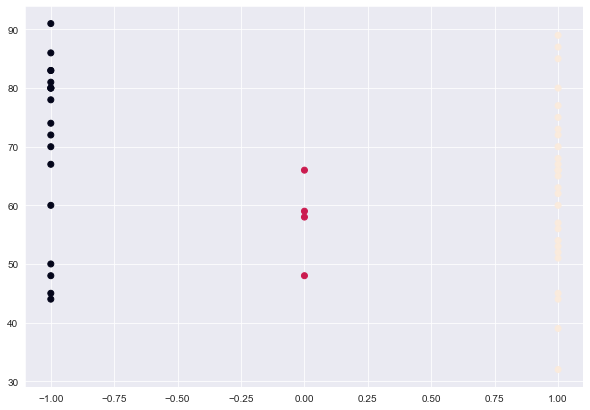

In [51]:
# plot clusters

plt.figure(figsize=(10,7))
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_)
plt.show()
